# Data preparation

## Import of required libraries
Those libraries are used in the notebook to perform the data preparation. Maybee you need to install them first with `pip install <library>`. 

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
import warnings
warnings.filterwarnings('ignore')
import string
string.punctuation
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.metrics import classification_report , confusion_matrix
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First I want to import the news, which has been labeled as true. I will use the pandas library for this task. The value "Real" will be set in the column "real/fake" for the further processing.

In [3]:
real_news_df = pd.read_csv('../Machine_Learning2_Project/10_datasource/10_true.csv')
real_news_df['real/fake'] = 'Real'
real_news_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date real/fake  
0  December 31, 2017       Real  
1  December 29, 2017       Real  
2  December 31, 2017       Real  
3  December 30, 2017       Real  
4  December 29, 2017       Real

Now I want to import the news, which has been labeled as fake. Again I will use the pandas library. The value "Fake" will be set in the column "real/fake" for the further processing.

In [4]:
fake_news_df = pd.read_csv('../Machine_Learning2_Project/10_datasource/11_fake.csv')
fake_news_df['real/fake'] = 'Fake'
fake_news_df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date real/fake  
0  December 31, 2017      Fake  
1  December 31, 2017      Fake  
2  December 30, 2017      Fake  
3  December 29, 2017      Fake  
4  December 25, 2017      Fake

For the further processing I prefer to have on dataframe with all news. Therefore I will merge the two dataframes into one dataframe.

In [5]:
data = pd.concat([real_news_df,fake_news_df],ignore_index=True)
display(data.head())
display(data.tail())

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date real/fake  
0  December 31, 2017       Real  
1  December 29, 2017       Real  
2  December 31, 2017       Real  
3  December 30, 2017       Real  
4  December 29, 2017       Real

title  \
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
44893  21st Century Wire says As 21WIRE reported earl...  Middle-east   
44894  21st Century Wire says It s a familiar theme. ...  Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
44896  21st Century Wire says Al Jazeera America will...  Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date real/fake  
44893  January 16, 2016      Fake  
44894  January 16, 2016      Fake  
44895  January 15, 2016      Fake  
44896  January 14, 2016      Fake  
44897  January 12, 2016      Fake

After the merging I will check how many news and columns are in the dataframe.

In [6]:
data.shape

(44898, 5)

Now I want to have an better overview of the new dataframe. I want to check which columns are available and if they have any missing values in it.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   real/fake  44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


On the first view the column "subject" is interessting and I want to have a closer look at it. I want to know how many different values are in the column and how often they occur.

In [8]:
data.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

I want to see the distribution of the values in the column "subject" as a visual. Therefore I will use the matplotlib library.

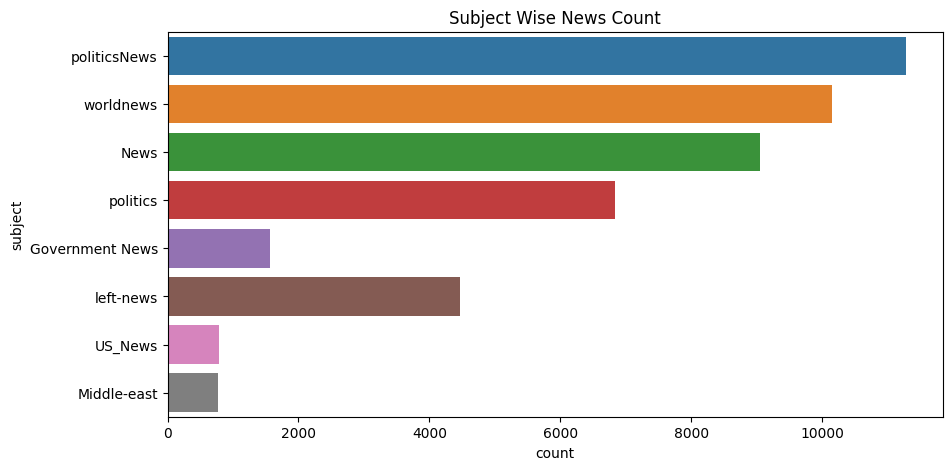

In [9]:
plt.figure(figsize = (10,5))
plt.title("Subject Wise News Count")
sns.countplot(y = "subject", data = data)
plt.show()

This looks like a good distribution. I will keep the column "subject" for the further processing and want to check how the distribution will be if I seperate them by the values of the column "real/fake". Depends on the distribution I will keep the column "subject" or not for the further processing.

<Axes: xlabel='subject', ylabel='count'>

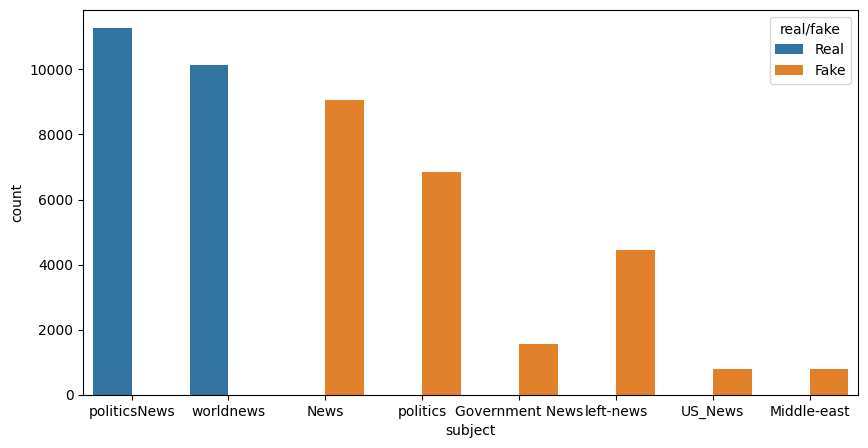

In [10]:
plt.figure(figsize=(10,5))

sns.countplot(x='subject', hue='real/fake', data=data)

Oh no, this looks not good. The fake news and real news are nearly separated by the subjects, but this can't bee a valid option to classify the news just by the subject. Therefore I will drop the column "subject" for the further processing.

Before I will remove any columns I want to make sure again that there are no missing values in the dataframe, which could cause furhter errors.


In [14]:
# Checking for null values
data.isnull().sum()

title        0
text         0
subject      0
date         0
real/fake    0
dtype: int64

After I have checked that there are no missing values in the dataframe, I will remove the columns "subject" and "date" from the dataframe. I will not use them for the further processing. I will also remove the column "date" because you should not classify the news by the publishing date.

In [15]:
data.drop(['date','subject'],axis=1,inplace=True)
data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text real/fake  
0  WASHINGTON (Reuters) - The head of a conservat...      Real  
1  WASHINGTON (Reuters) - Transgender people will...      Real  
2  WASHINGTON (Reuters) - The special counsel inv...      Real  
3  WASHINGTON (Reuters) - Trump campaign adviser ...      Real  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...      Real

Personly I prefer the column name "headings" instead of "title". Therefore I will rename the column "title" to "headings".

In [16]:
data.rename(columns={'title':'headings'},inplace=True)    
data.head()

headings  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text real/fake  
0  WASHINGTON (Reuters) - The head of a conservat...      Real  
1  WASHINGTON (Reuters) - Transgender people will...      Real  
2  WASHINGTON (Reuters) - The special counsel inv...      Real  
3  WASHINGTON (Reuters) - Trump campaign adviser ...      Real  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...      Real

As next step I want to remove the duplicates from the dataframe.

In [17]:
data.duplicated().sum()

5793

In [18]:
data.drop_duplicates(inplace=True)
data.shape

(39105, 3)

After the removal of the duplicates I want to check again how many news and columns are in the dataframe to make sure that the distribution is still good and that there are "enough" news in both categories for the next steps.

In [19]:
print(data['real/fake'].value_counts())
fig = px.histogram(data,x=data['real/fake'],color="real/fake",text_auto=True,color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(title="real/fake count",xaxis_title="real/fake",yaxis_title="Count")
fig.show()

Real    21197
Fake    17908
Name: real/fake, dtype: int64


The numbers are good so I can continue with the next steps.

## Text Pre-processing
In this step I will perform the text pre-processing so that I can use it afterwards to create the classification model.

### Removing punctuation
As first step I want to remove all the punctuation from the text. Therefore I will use the string library of Python, it contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[]^_`{|}~’.

In [20]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
data[['headings','text']] = data[['headings','text']].applymap(lambda x:remove_punctuation(x))
data.head()

headings  \
0  As US budget fight looms Republicans flip thei...   
1  US military to accept transgender recruits on ...   
2  Senior US Republican senator Let Mr Mueller do...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge much more...   

                                                text real/fake  
0  WASHINGTON Reuters  The head of a conservative...      Real  
1  WASHINGTON Reuters  Transgender people will be...      Real  
2  WASHINGTON Reuters  The special counsel invest...      Real  
3  WASHINGTON Reuters  Trump campaign adviser Geo...      Real  
4  SEATTLEWASHINGTON Reuters  President Donald Tr...      Real

### Lowering the text
It is one of the most common text preprocessing Python steps where the text is converted into the same case preferably lower case.

In [21]:
data[['headings','text']] = data[['headings','text']].applymap(lambda x:x.lower())
data.head()

headings  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                                text real/fake  
0  washington reuters  the head of a conservative...      Real  
1  washington reuters  transgender people will be...      Real  
2  washington reuters  the special counsel invest...      Real  
3  washington reuters  trump campaign adviser geo...      Real  
4  seattlewashington reuters  president donald tr...      Real

### Tokenization
That the model will be able to understand the text better, I will split the text into smaller units. I will use the word tokenization for this task. The word tokenization is the process of splitting a large sample of text into words. This is a requirement in natural language processing tasks where each word needs to be captured and subjected to further analysis like classifying a word as a noun, verb, adjective etc.

In [22]:
def tokenization(text1):
    tokens = re.split('\s+',''.join(text1))
    return tokens
data[['headings','text']] = data[['headings','text']].applymap(lambda x:tokenization(x))
data.head()

headings  \
0  [as, us, budget, fight, looms, republicans, fl...   
1  [us, military, to, accept, transgender, recrui...   
2  [senior, us, republican, senator, let, mr, mue...   
3  [fbi, russia, probe, helped, by, australian, d...   
4  [trump, wants, postal, service, to, charge, mu...   

                                                text real/fake  
0  [washington, reuters, the, head, of, a, conser...      Real  
1  [washington, reuters, transgender, people, wil...      Real  
2  [washington, reuters, the, special, counsel, i...      Real  
3  [washington, reuters, trump, campaign, adviser...      Real  
4  [seattlewashington, reuters, president, donald...      Real

### Stop words removal
Stop words like “the”, “a”, “an”, “in” etc. are very common in all English sentences and are not very meaningful. Because of this I eliminate them from the text using stop words removal technique from the NLTK library.

In [23]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(texts):
    output= [i for i in texts if i not in stopwords]
    return output
data[['headings','text']] = data[['headings','text']].applymap(lambda x:remove_stopwords(x))
data.head()

headings  \
0  [us, budget, fight, looms, republicans, flip, ...   
1  [us, military, accept, transgender, recruits, ...   
2  [senior, us, republican, senator, let, mr, mue...   
3  [fbi, russia, probe, helped, australian, diplo...   
4  [trump, wants, postal, service, charge, much, ...   

                                                text real/fake  
0  [washington, reuters, head, conservative, repu...      Real  
1  [washington, reuters, transgender, people, all...      Real  
2  [washington, reuters, special, counsel, invest...      Real  
3  [washington, reuters, trump, campaign, adviser...      Real  
4  [seattlewashington, reuters, president, donald...      Real

### Stemming
Stemming is necessary to avoid multiple copies of the same word. For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’. I will use the PorterStemmer from the NLTK library for this task.

In [24]:
porter_stemmer = PorterStemmer()
def stemming(texts):
    stem_text = [porter_stemmer.stem(word) for word in texts]
    return stem_text
data[['headings','text']] = data[['headings','text']].applymap(lambda x: stemming(x))
data.head()

headings  \
0  [us, budget, fight, loom, republican, flip, fi...   
1  [us, militari, accept, transgend, recruit, mon...   
2  [senior, us, republican, senat, let, mr, muell...   
3  [fbi, russia, probe, help, australian, diploma...   
4  [trump, want, postal, servic, charg, much, ama...   

                                                text real/fake  
0  [washington, reuter, head, conserv, republican...      Real  
1  [washington, reuter, transgend, peopl, allow, ...      Real  
2  [washington, reuter, special, counsel, investi...      Real  
3  [washington, reuter, trump, campaign, advis, g...      Real  
4  [seattlewashington, reuter, presid, donald, tr...      Real

After stemming, I notice that the values in headings and text are no longer really different, so I decide to merge these two columns in the dataframe. The new column will be called "news".

In [25]:
data['news'] = data['headings'].astype(str)+','+data['text'].astype(str)
data.drop(['headings','text'],axis=1,inplace=True)
data=data.iloc[:,[1,0]]
data['news']=data['news'].map(lambda x:' '.join(re.findall('\w+',x)))
data.head()

news real/fake
0  us budget fight loom republican flip fiscal sc...      Real
1  us militari accept transgend recruit monday pe...      Real
2  senior us republican senat let mr mueller job ...      Real
3  fbi russia probe help australian diplomat tipo...      Real
4  trump want postal servic charg much amazon shi...      Real

After the stemming I want to see the main "words" in the fake news. Therefore I will use the wordcloud library.

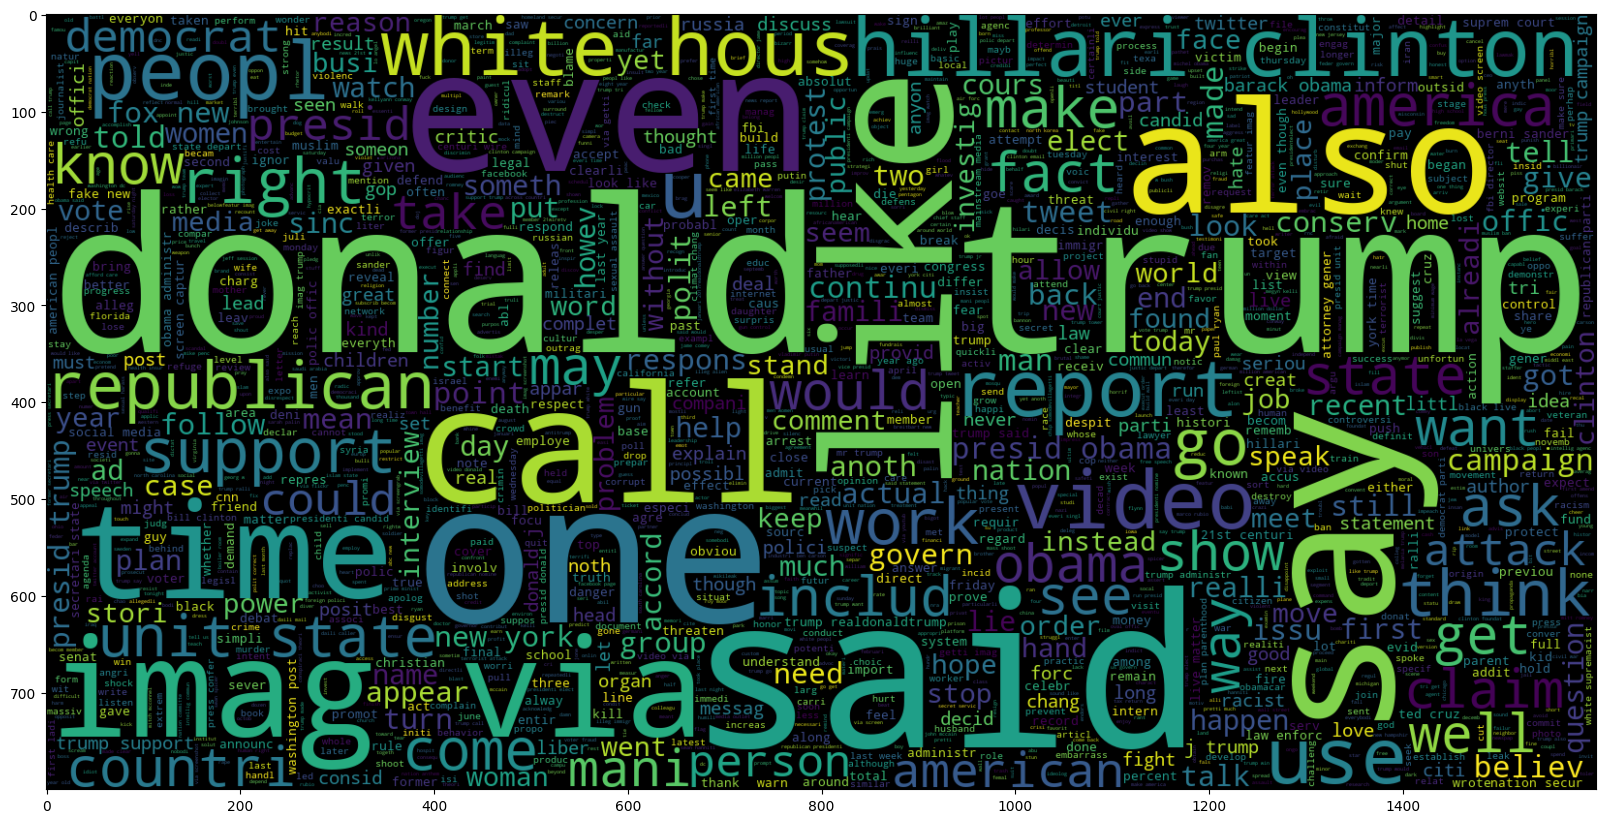

In [27]:
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=stop).generate(" ".join(data[data['real/fake']=='Fake'].news))
plt.imshow(wc, interpolation='bilinear')

And I want to check if the real news has the same main "words" as the fake news. So I will also create a wordcloud for them that I can compare them.

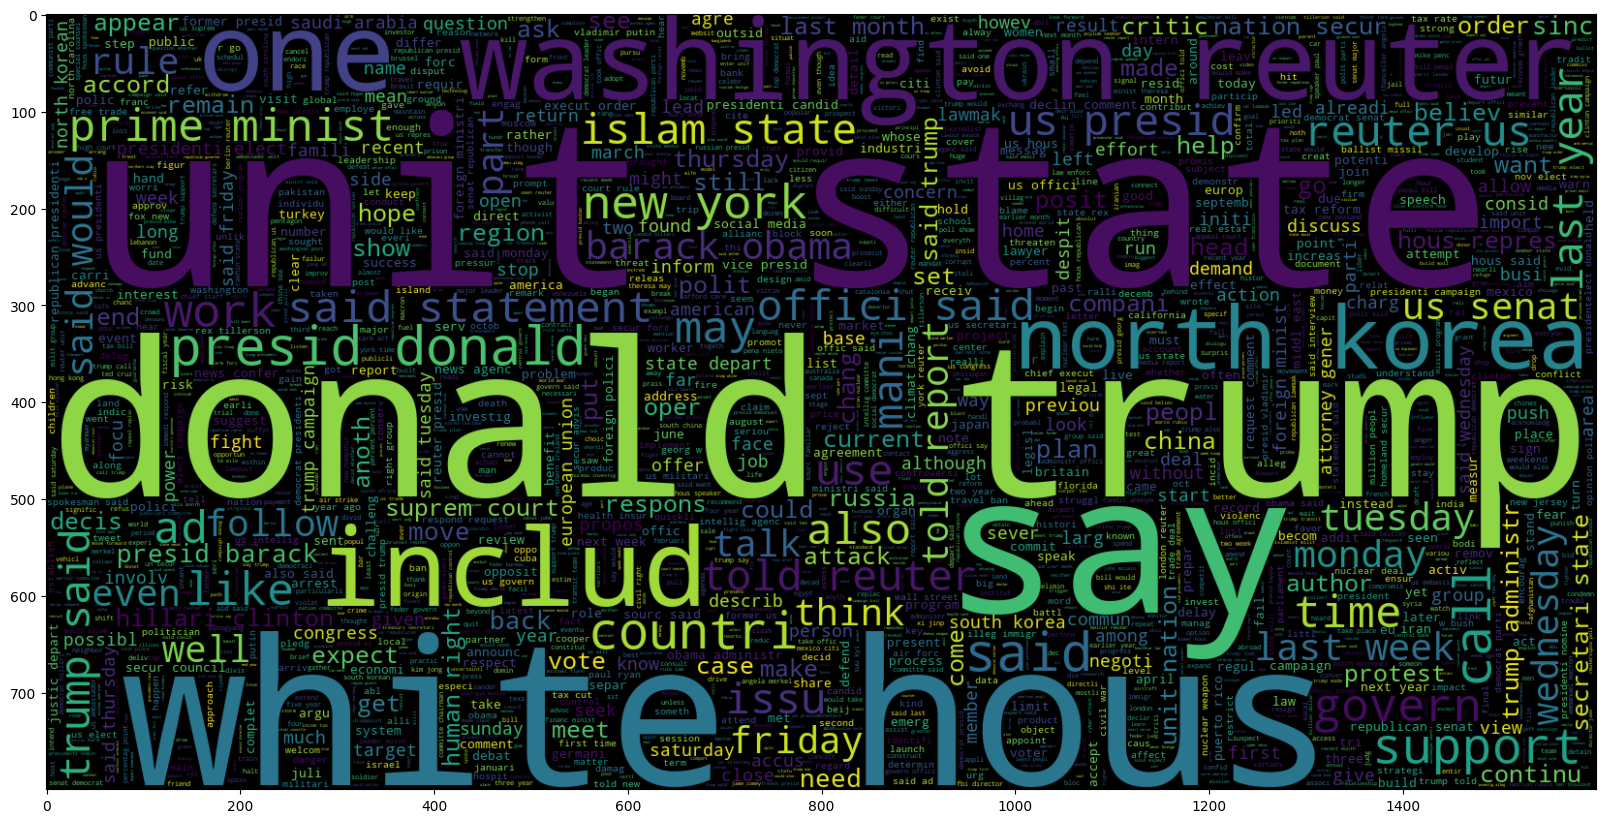

In [28]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop).generate(" ".join(data[data['real/fake']=='Real'].news))
plt.imshow(wc , interpolation = 'bilinear')

In both word clouds I can see the "main topic" Donald Trump, which is not really surprising because the news are from the US and Donald Trump was then the president at this time. But there are also different words in the word clouds, which is that was I was hoping for. So will go on with this data and save them in a csv file for the further processing.

In [27]:
data.to_csv('../Machine_Learning2_Project/20_model_evaluation/20_cleaned_data.csv')

The next Notebook will be 02_data_analysis.